In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
train_dir = r'C:\Users\Saksham Sharma\Desktop\train'
test_dir = r'C:\Users\Saksham Sharma\Desktop\test'
validation_dir = r'C:\Users\Saksham Sharma\Desktop\validation'

In [4]:
#to covert jpeg images into RBG matrices:
from tensorflow.keras.preprocessing.image import ImageDataGenerator #can be used for data augmentation as well

In [5]:
#generating batches of tensor images data
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale  = 1./255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size = (150, 150),
                    batch_size = 20,
                    class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
                        validation_dir,
                        target_size = (150, 150),
                        batch_size = 20,
                        class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
from tensorflow.keras import optimizers

model.compile(loss = "binary_crossentropy",
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ["acc"])

In [10]:
history = model.fit_generator(train_generator,
                             steps_per_epoch = 100,  # (number of images / batch size)
                             epochs = 20,
                             validation_data = validation_generator,
                             validation_steps = 50)

Epoch 1/20
100/100 [==============================] - 29s 293ms/step - loss: 0.6894 - acc: 0.5430 - val_loss: 0.6764 - val_acc: 0.6350
Epoch 2/20
100/100 [==============================] - 20s 203ms/step - loss: 0.6511 - acc: 0.6315 - val_loss: 0.6396 - val_acc: 0.6120
Epoch 3/20
100/100 [==============================] - 21s 206ms/step - loss: 0.6030 - acc: 0.6795 - val_loss: 0.5991 - val_acc: 0.6850
Epoch 4/20
100/100 [==============================] - 20s 202ms/step - loss: 0.5623 - acc: 0.7035 - val_loss: 0.5849 - val_acc: 0.6870
Epoch 5/20
100/100 [==============================] - 21s 207ms/step - loss: 0.5358 - acc: 0.7310 - val_loss: 0.5856 - val_acc: 0.6810
Epoch 6/20
100/100 [==============================] - 21s 205ms/step - loss: 0.5089 - acc: 0.7420 - val_loss: 0.5959 - val_acc: 0.6790
Epoch 7/20
100/100 [==============================] - 21s 207ms/step - loss: 0.4828 - acc: 0.7665 - val_loss: 0.5682 - val_acc: 0.6970
Epoch 8/20
100/100 [==============================] - 2

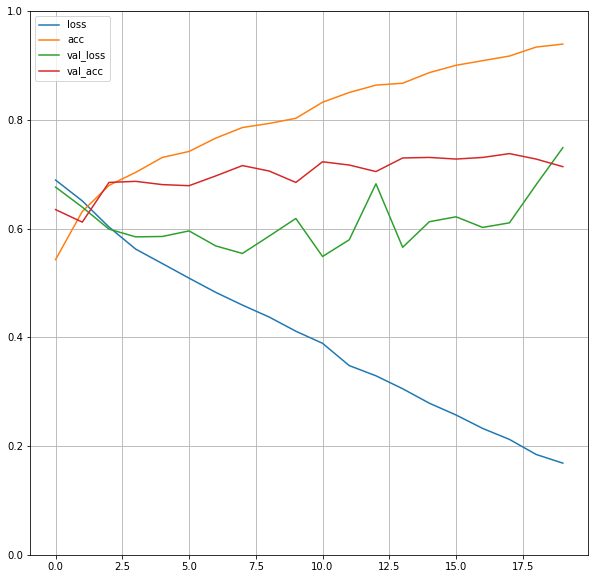

In [12]:
pd.DataFrame(history.history).plot(figsize = (10, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

AS CLEARLY SEEN FROM TH EGRAPH THAT THERE IS A LOT OF DIFFERENCE BETWEEN TRAINING AND VALIDATION ACCURACY, WHICH IS A CLEAR SIGN OF OVERFITTING

In [14]:
from tensorflow.keras import backend as K
K.clear_session()
del model